<a href="https://colab.research.google.com/github/VageeshaDatta/Deep-Learning/blob/master/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mounting the Google Drive To Access The Dataset**

In [7]:
import os

os.chdir('/content/drive/MyDrive/Disaster/dataset')



# **Reading The Dataset**

In [8]:
import pandas as pd #Importing pandas library
data = pd.read_csv("tweets.csv")
data.head() #Prints the first 5 rows of the  dataset 

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


# **Preprocessing The Data**

In [9]:
data.isnull().sum() #Checking for total count of null values in each feature 

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [10]:
data.shape #Shape of the dataset

(11370, 5)

In [11]:
data["location"].fillna(method='bfill',inplace=True)  #Replacing the NaN or null values using bfill(backward fill)

#Backward fill is a function which replaces current NaN values with corresponding value in the next row

In [12]:
data["location"].fillna(method='ffill',inplace=True)  #Replacing the NaN or null values using ffill(forward fill)

#Forward fill is a function which replaces current NaN values with corresponding value in the before row

In [13]:
data.isnull().sum()   #Checking the data for null or NaN values again 

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [14]:
data.head(7)  #Checking the data again to see if the NaN values are replaced 

,id,keyword,location,text,target
0,0,ablaze,New York City,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,New York City,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,OC,"""Lord Jesus, your love brings freedom and pard...",0
5,5,ablaze,OC,"If this child was Chinese, this tweet would ha...",0
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1


In [15]:
columns = []      #creating a list named "columns" and saving the names of columns in it
for i in data.columns:
  columns.append(i)
columns

['id', 'keyword', 'location', 'text', 'target']

In [16]:
import numpy as np            #Checking for unique values in each feature
for i in columns:             #Target feature shows that there are only 2 unique values, so we have to use binary cross entropy while creating model
  print("number of unique values in ",i," = ",len(np.unique(data[i])))

number of unique values in  id  =  11370
number of unique values in  keyword  =  219
number of unique values in  location  =  4504
number of unique values in  text  =  11223
number of unique values in  target  =  2


In [17]:
from sklearn.preprocessing import LabelEncoder      #Importing the label encoder to convert keyword, location into a numerical value



data['keyword'] = LabelEncoder().fit_transform(data['keyword'])
data['location'] = LabelEncoder().fit_transform(data['location'])


data.head()    #checking the data after conversion

,id,keyword,location,text,target
0,0,0,2265,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,0,2265,Telangana: Section 144 has been imposed in Bha...,1
2,2,0,2265,Arsonist sets cars ablaze at dealership https:...,1
3,3,0,2104,Arsonist sets cars ablaze at dealership https:...,1
4,4,0,2389,"""Lord Jesus, your love brings freedom and pard...",0



#  **Visualising The Data**

In [18]:
true_disaster = []
false_disaster = []
for i in data['target']:             #Checking the data distribution interms of percentage
  if i == 1:
    true_disaster.append(i)
  else:
    false_disaster.append(i)
print("percentage of True disaster tweets =",(len(true_disaster)/len(data['target']))*100)
print("percentage of False disaster tweets =",(len(false_disaster)/len(data['target']))*100)

percentage of True disaster tweets = 18.59278803869833
percentage of False disaster tweets = 81.40721196130167


In [19]:
import seaborn as sns        #Importing libraries for data visualisation
import matplotlib.pyplot as plt

<BarContainer object of 2114 artists>

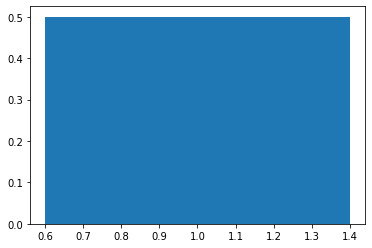

In [20]:
plt.bar(x=true_disaster,height = 0.5)

<BarContainer object of 9256 artists>

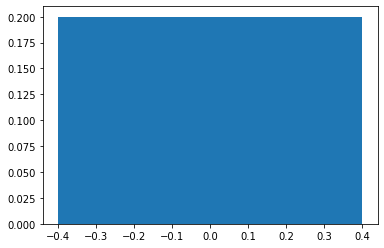

In [21]:
plt.bar(x=false_disaster,height = 0.2)

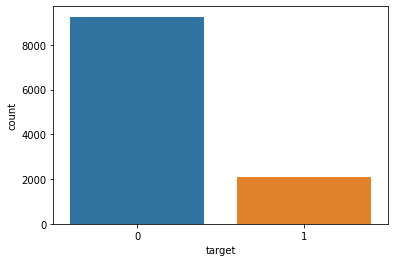

In [22]:
sns.countplot(x='target',data=data)     #visualising the count of true news anf false news with respective full dataset

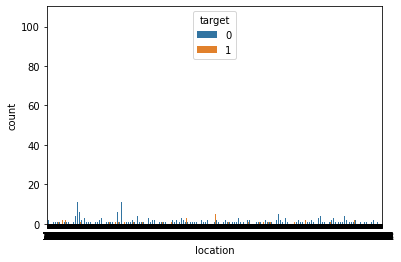

In [26]:
sns.countplot(x='location',hue='target',data=data)

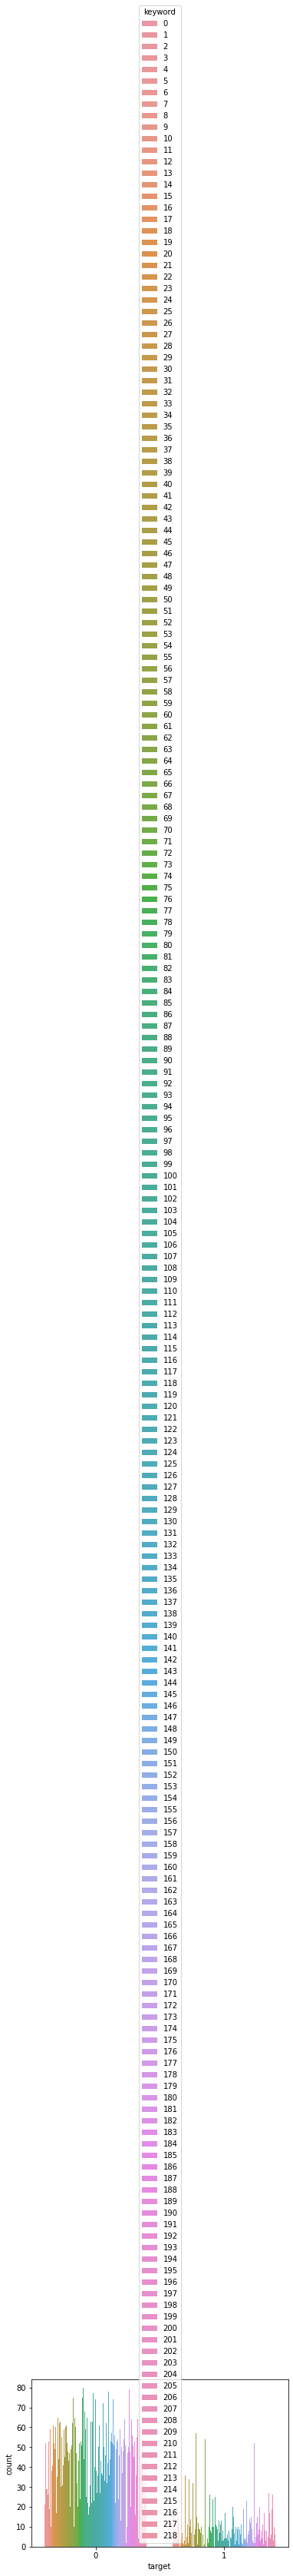

In [27]:
sns.countplot(x = 'target',hue='keyword',data=data)
plt.show()

In [28]:
data.head()

,id,keyword,location,text,target
0,0,0,2265,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,0,2265,Telangana: Section 144 has been imposed in Bha...,1
2,2,0,2265,Arsonist sets cars ablaze at dealership https:...,1
3,3,0,2104,Arsonist sets cars ablaze at dealership https:...,1
4,4,0,2389,"""Lord Jesus, your love brings freedom and pard...",0


## **Creating The Model**

In [ ]:
data.head()

,id,keyword,location,text,target
0,0,0,2265,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,0,2265,Telangana: Section 144 has been imposed in Bha...,1
2,2,0,2265,Arsonist sets cars ablaze at dealership https:...,1
3,3,0,2104,Arsonist sets cars ablaze at dealership https:...,1
4,4,0,2389,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
data.drop(["id","keyword","location"],axis = 1,inplace=True)

In [ ]:
data.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


In [4]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [30]:
x = data['text']
y = data['target']

In [31]:
y = np.array(y)
y

array([1, 1, 1, ..., 0, 0, 1])

In [32]:
tokenizer = Tokenizer(num_words=5000,lower=True)
tokenizer.fit_on_texts(x)    #Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency
len(tokenizer.word_index)   
dict_size = len(tokenizer.word_index)+1
print(dict_size)

30730


In [33]:
from keras.preprocessing.sequence import pad_sequences

#transforms each text in texts to a sequence of integers. 
#So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary
encoded_sequence = tokenizer.texts_to_sequences(x)
final_input = pad_sequences(encoded_sequence,maxlen=200,padding='pre')

In [34]:
x[0]

'Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…'

In [35]:
encoded_sequence[0]

[4335,
 839,
 8,
 1699,
 1580,
 2380,
 69,
 4336,
 13,
 794,
 9,
 78,
 794,
 9,
 1424,
 69,
 277]

In [36]:
final_input[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [37]:
final_output = y

# **Model 1:LSTM(Long Short Term Memory)**

In [39]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Bidirectional,SpatialDropout1D,Dropout




dimension = 32
model1 = Sequential()
model1.add(Embedding(dict_size, dimension,input_length=200) )
model1.add(SpatialDropout1D(0.25))
model1.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(120,return_sequences=True))
model1.add(Dropout(0.3))
model1.add(LSTM(40))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

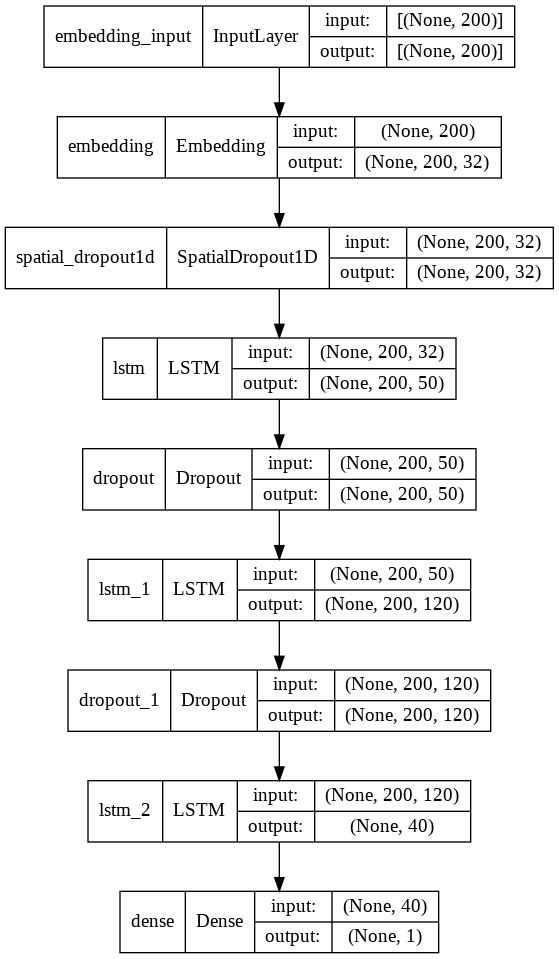

In [50]:
from tensorflow.keras.utils import plot_model
plot_model(model1,show_shapes=True,show_layer_names=True,rankdir="TB",dpi=96)

In [40]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           983360    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 200, 50)           16600     
                                                                 
 dropout (Dropout)           (None, 200, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 200, 120)          82080     
                                                                 
 dropout_1 (Dropout)         (None, 200, 120)          0         
                                                        

In [44]:
prediction1 = model1.fit(final_input,final_output,epochs=7,batch_size=32)

Epoch 1/7
356/356 [==============================] - 206s 560ms/step - loss: 0.3893 - accuracy: 0.8468
Epoch 2/7
356/356 [==============================] - 201s 565ms/step - loss: 0.2546 - accuracy: 0.9058
Epoch 3/7
356/356 [==============================] - 201s 565ms/step - loss: 0.2137 - accuracy: 0.9237
Epoch 4/7
356/356 [==============================] - 201s 565ms/step - loss: 0.1874 - accuracy: 0.9319
Epoch 5/7
356/356 [==============================] - 204s 573ms/step - loss: 0.1679 - accuracy: 0.9409
Epoch 6/7
356/356 [==============================] - 202s 568ms/step - loss: 0.1497 - accuracy: 0.9464
Epoch 7/7
356/356 [==============================] - 199s 559ms/step - loss: 0.1324 - accuracy: 0.9520


In [45]:
model1.save("Disasater predictor_Lstm.h5")

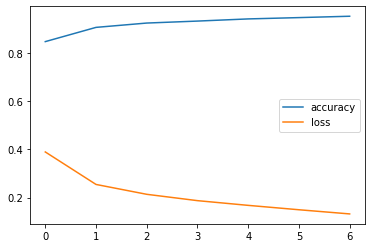

In [46]:
plt.plot(prediction1.history['accuracy'],label='accuracy')
plt.plot(prediction1.history['loss'],label='loss')
plt.legend(loc='best')
plt.show()

# **Testing LSTM Model on Random Data**

In [47]:
def predict_disaster_onmodel1(tweet):
  l = []
  l.append(tweet)
  sequence = tokenizer.texts_to_sequences(l)
  pad_seq = pad_sequences(sequence,maxlen=200,padding='pre')
  output = model1.predict(pad_seq)
  if int(output.round().item()) == 1:
    print("True,it's a true news after disaster")
  else:
    print("This is a False news")

In [48]:
predict_disaster_onmodel1("Communal violence in Bhainsa, Telangana.Stones were pelted on Muslims houses and some houses and vehicles were set ablaze…")

predict_disaster_onmodel1('Social media went bananas after Chuba Hubbard announced Monday evening his plans to return to #okstate.')

predict_disaster_onmodel1('On plus side look at the sky last night it was ablaze')

predict_disaster_onmodel1('Heavy flooding in Siacca Sicily Italy causing heavy damge')

predict_disaster_onmodel1('"This is absolutely terrifying," one commenter declared of a demolished, red velvet Yoda-head cake.')

True,it's a true news after disaster
This is a False news
True,it's a true news after disaster
True,it's a true news after disaster
This is a False news


# **Model 2:Bidirectional LSTM**

In [53]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Bidirectional,SpatialDropout1D,Dropout
from keras.layers.core import Dense, Activation, Dropout

dimension = 32
model2 = Sequential()
model2.add(Embedding(dict_size, dimension,input_length=200))
forward_layer = LSTM(16, return_sequences=True)
backward_layer = LSTM(16, activation='sigmoid', return_sequences=True,
                       go_backwards=True)
model2.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                         input_shape=(200, 32)))
model2.add(LSTM(40, dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model2.add(LSTM(40))
model2.add(Dense(1, activation= 'sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model2.summary()



prediction2 = model2.fit(final_input,final_output,epochs=5,batch_size=32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           983360    
                                                                 
 bidirectional (Bidirectiona  (None, 200, 32)          6272      
 l)                                                              
                                                                 
 lstm_5 (LSTM)               (None, 200, 40)           11680     
                                                                 
 lstm_6 (LSTM)               (None, 40)                12960     
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,014,313
Trainable params: 1,014,313
Non-trainable params: 0
____________________________________________

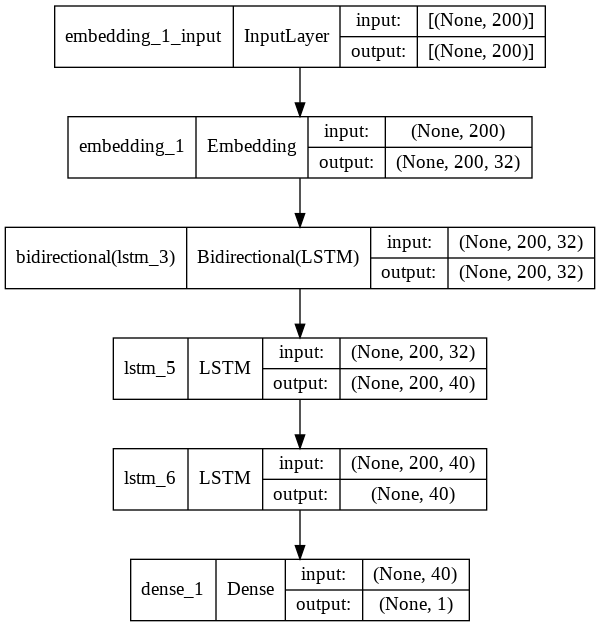

In [54]:
from tensorflow.keras.utils import plot_model
plot_model(model2,show_shapes=True,show_layer_names=True,rankdir="TB",dpi=96)

In [55]:
model2.save("Disasater predictor_bidirecLstm.h5")

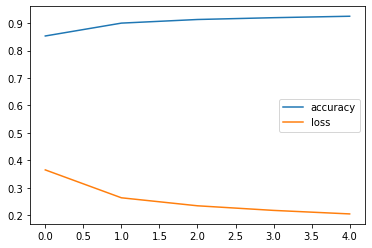

In [56]:
plt.plot(prediction2.history['accuracy'],label='accuracy')
plt.plot(prediction2.history['loss'],label='loss')
plt.legend(loc='best')
plt.show()

# **Testing Bi-Directional LSTM Model on Random Data**

In [57]:
def predict_disaster_onmodel2(tweet):
  l = []
  l.append(tweet)
  sequence = tokenizer.texts_to_sequences(l)
  pad_seq = pad_sequences(sequence,maxlen=200,padding='pre')
  output = model2.predict(pad_seq)
  if int(output.round().item()) == 1:
    print("True,it's a true news after disaster")
  else:
    print("This is a False news")

In [58]:
predict_disaster_onmodel2("Communal violence in Bhainsa, Telangana.Stones were pelted on Muslims houses and some houses and vehicles were set ablaze…")

predict_disaster_onmodel2('Social media went bananas after Chuba Hubbard announced Monday evening his plans to return to #okstate.')

predict_disaster_onmodel2('On plus side look at the sky last night it was ablaze')

predict_disaster_onmodel2('Heavy flooding in Siacca Sicily Italy causing heavy damge')

predict_disaster_onmodel2('"This is absolutely terrifying," one commenter declared of a demolished, red velvet Yoda-head cake.')

True,it's a true news after disaster
This is a False news
This is a False news
This is a False news
This is a False news


# **Model 3:GRU(Gated Recurrent Unit )**

In [60]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout

model3 = Sequential()
model3.add(Embedding(dict_size, dimension,input_length=200))
model3.add(SpatialDropout1D(0.5))
model3.add(GRU(50, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
model3.add(GRU(100, dropout=0.5, recurrent_dropout=0.5))

model3.add(Dense(120, activation='relu'))
model3.add(Dropout(0.8))

model3.add(Dense(120, activation='relu'))
model3.add(Dropout(0.8))

model3.add(Dense(1))
model3.add(Activation('sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model3.summary()


prediction3 = model3.fit(final_input,final_output,epochs=5,batch_size=32)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           983360    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 200, 50)           12450     
                                                                 
 gru_1 (GRU)                 (None, 100)               45300     
                                                                 
 dense_2 (Dense)             (None, 120)               12120     
                                                                 
 dropout_2 (Dropout)         (None, 120)               0         
                                                      

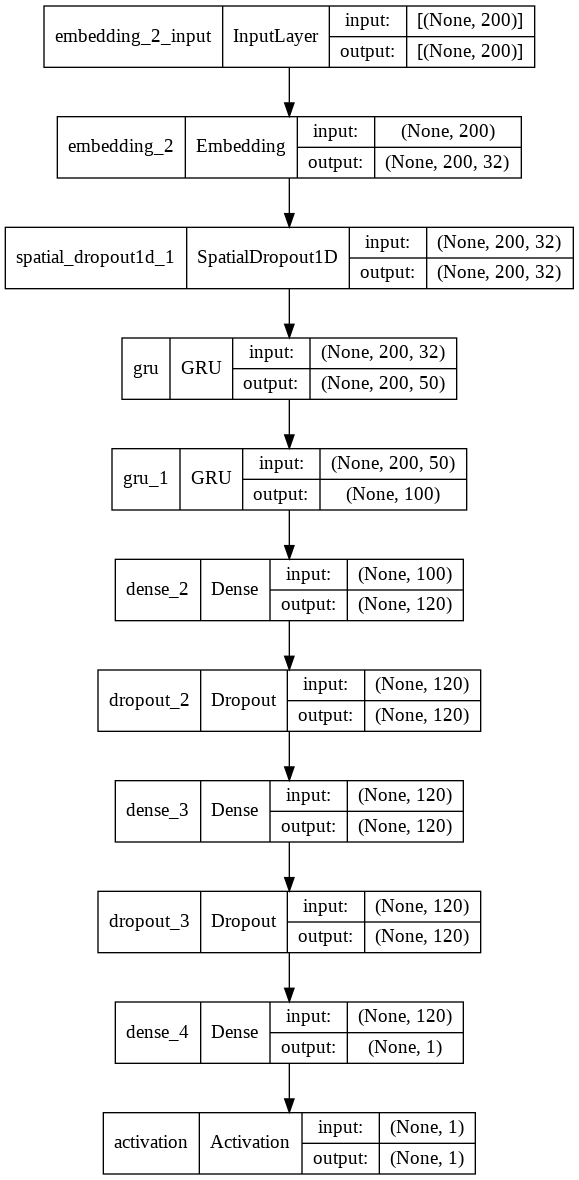

In [65]:
from tensorflow.keras.utils import plot_model
plot_model(model3,show_shapes=True,show_layer_names=True,rankdir="TB",dpi=96)

In [61]:
model3.save("Disasater predictor_GRU.h5")

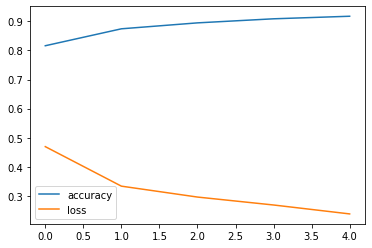

In [62]:
plt.plot(prediction3.history['accuracy'],label='accuracy')
plt.plot(prediction3.history['loss'],label='loss')
plt.legend(loc='best')
plt.show()

# **Testing GRU Model on Random Data**

In [63]:
def predict_disaster_onmodel3(tweet):
  l = []
  l.append(tweet)
  sequence = tokenizer.texts_to_sequences(l)
  pad_seq = pad_sequences(sequence,maxlen=200,padding='pre')
  output = model3.predict(pad_seq)
  if int(output.round().item()) == 1:
    print("True,it's a true news after disaster")
  else:
    print("This is a False news")

In [64]:
predict_disaster_onmodel3("Communal violence in Bhainsa, Telangana.Stones were pelted on Muslims houses and some houses and vehicles were set ablaze…")

predict_disaster_onmodel3('Social media went bananas after Chuba Hubbard announced Monday evening his plans to return to #okstate.')

predict_disaster_onmodel3('On plus side look at the sky last night it was ablaze')

predict_disaster_onmodel3('Heavy flooding in Siacca Sicily Italy causing heavy damge')

predict_disaster_onmodel3('"This is absolutely terrifying," one commenter declared of a demolished, red velvet Yoda-head cake.')

True,it's a true news after disaster
This is a False news
True,it's a true news after disaster
True,it's a true news after disaster
This is a False news
